<a href="https://colab.research.google.com/github/tymepas/GenAI_30days/blob/main/GAI_D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metrics

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [5]:
# Example data
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [6]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7


In [7]:
# Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision}")

Precision: 0.8


In [24]:
# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.67


In [9]:
# F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1}")

F1-Score: 0.7272727272727273


In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[3 1]
 [2 4]]


# Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score, KFold

In [12]:
# Example dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target
model = LogisticRegression(max_iter=200)

In [13]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X, y, cv=kf)
print(f"K-Fold Cross-Validation Scores: {kf_scores}")

K-Fold Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]


# Hands-on: Comparing different Classification Models

In [14]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

In [16]:
# Use a subset of the dataset for quicker computation
subset_size = 10000
X, y = X[:subset_size], y[:subset_size]

In [17]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(kernel='linear')
}

In [19]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
# Compare models
for model_name, model in models.items():
    pipeline = Pipeline([('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Accuracy: {np.mean(scores)}")

Logistic Regression Accuracy: 0.8857999999999999
Random Forest Accuracy: 0.9481999999999999
Support Vector Machine Accuracy: 0.9138999999999999


In [21]:
# Analyze performance
results = {
    "Logistic Regression": [],
    "Random Forest": [],
    "Support Vector Machine": []
}

In [22]:
# K-Fold Cross-Validation
for model_name, model in models.items():
    pipeline = Pipeline([('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(scores)}")
    print(f"{model_name} Standard Deviation: {np.std(scores)}")

Logistic Regression Scores: [0.8995 0.8795 0.891  0.8755 0.8835]
Logistic Regression Mean Accuracy: 0.8857999999999999
Logistic Regression Standard Deviation: 0.008553361912137254
Random Forest Scores: [0.9515 0.9465 0.946  0.944  0.948 ]
Random Forest Mean Accuracy: 0.9472000000000002
Random Forest Standard Deviation: 0.002501999200639379
Support Vector Machine Scores: [0.9225 0.9105 0.9215 0.9015 0.9135]
Support Vector Machine Mean Accuracy: 0.9138999999999999
Support Vector Machine Standard Deviation: 0.00770973410695856


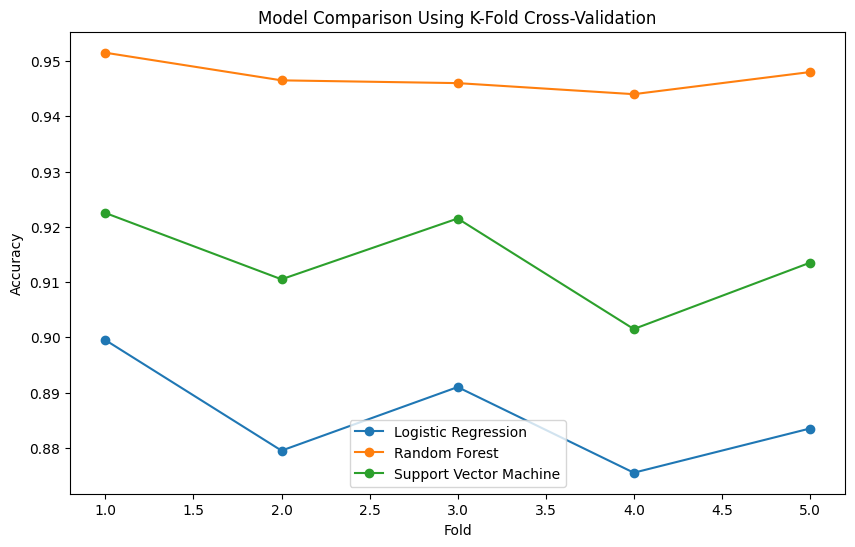

In [23]:
# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model_name, scores in results.items():
    plt.plot(range(1, kf.n_splits + 1), scores, marker='o', label=model_name)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Comparison Using K-Fold Cross-Validation')
plt.legend()
plt.show()